In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue20cs312/sample_submission.csv
/kaggle/input/data-analytics-ue20cs312/train.csv
/kaggle/input/data-analytics-ue20cs312/test.csv


 **Data Analytics (UE20CS312) Assignment
   Kaggle contest for the Fall 2022 Data Analytics course at PES University.**

 **EDA on Time Series Stock Market Prediction dataset**

In [2]:
df = pd.read_csv('../input/data-analytics-ue20cs312/train.csv')
df.set_index('Date', inplace=True)

In [3]:
test = pd.read_csv('../input/data-analytics-ue20cs312/test.csv')
test.set_index('Date', inplace=True)
test = test.iloc[:,0:-1]

In [4]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900
2016-01-11,1126.04,1134.69,1120.15,1130.93,43684900
2016-01-12,1134.63,1140.91,1122.60,1127.71,42286900
2016-01-13,1130.63,1131.98,1098.54,1100.22,51882600
2016-01-14,1102.76,1126.36,1095.25,1117.71,46357200


In [5]:
#checking for null values 
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**There are no null values**

In [6]:
#Checking for duplicate values 
df.duplicated().sum()

0

**There are no duplicate values**

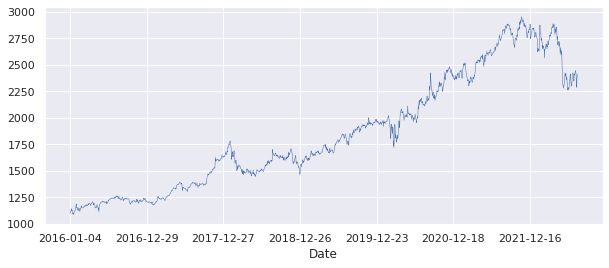

In [7]:
#To check the trend of the data and seasonality component (variations in a time series)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 4)})
df['Open'].plot(linewidth=0.5);


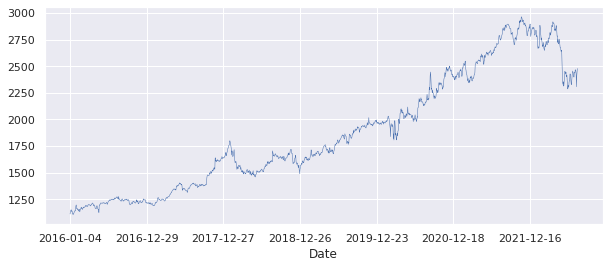

In [8]:
sns.set(rc={'figure.figsize':(10, 4)})
df['High'].plot(linewidth=0.5);

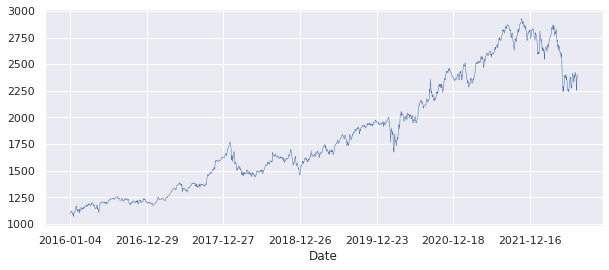

In [9]:
sns.set(rc={'figure.figsize':(10, 4)})
df['Low'].plot(linewidth=0.5);

 **Observation - Upward trend and multiplicative seasonality component** 

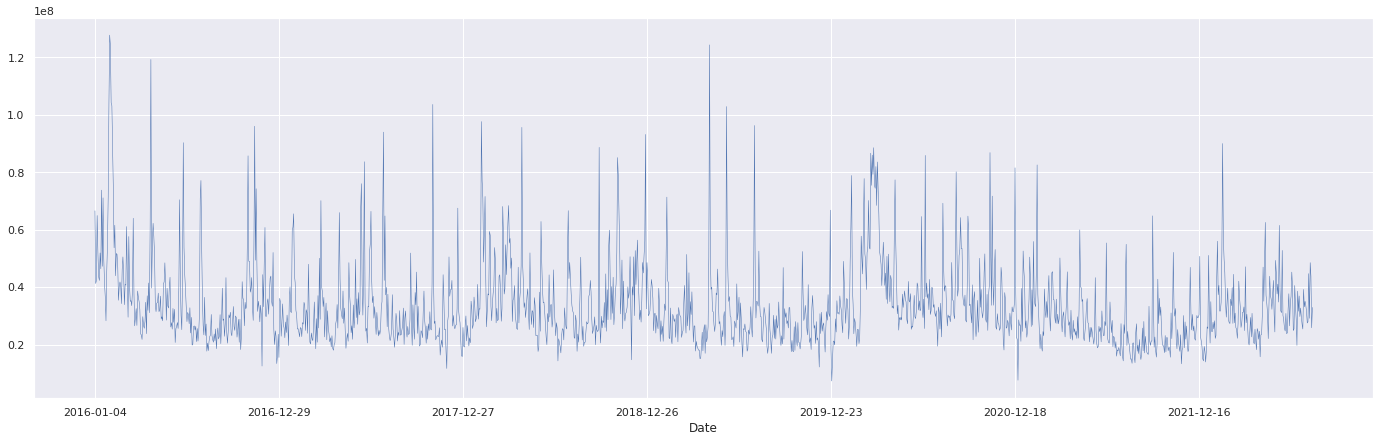

In [10]:
sns.set(rc={'figure.figsize':(24, 7)})
df['Volume'].plot(linewidth=0.5);

**As there are spikes at similar intervals ,there is a seasonality component** 

In [11]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999716,0.999748,0.999455,-0.173859
High,0.999716,1.000000,0.999541,0.999705,-0.166732
Low,0.999748,0.999541,1.000000,0.999692,-0.182352
Close,0.999455,0.999705,0.999692,1.000000,-0.175132
Volume,-0.173859,-0.166732,-0.182352,-0.175132,1.000000


**As the correlation coefficient between 'Open','High','Low'' is fairly positive, implies they are highly related,so a linear regression is used.**


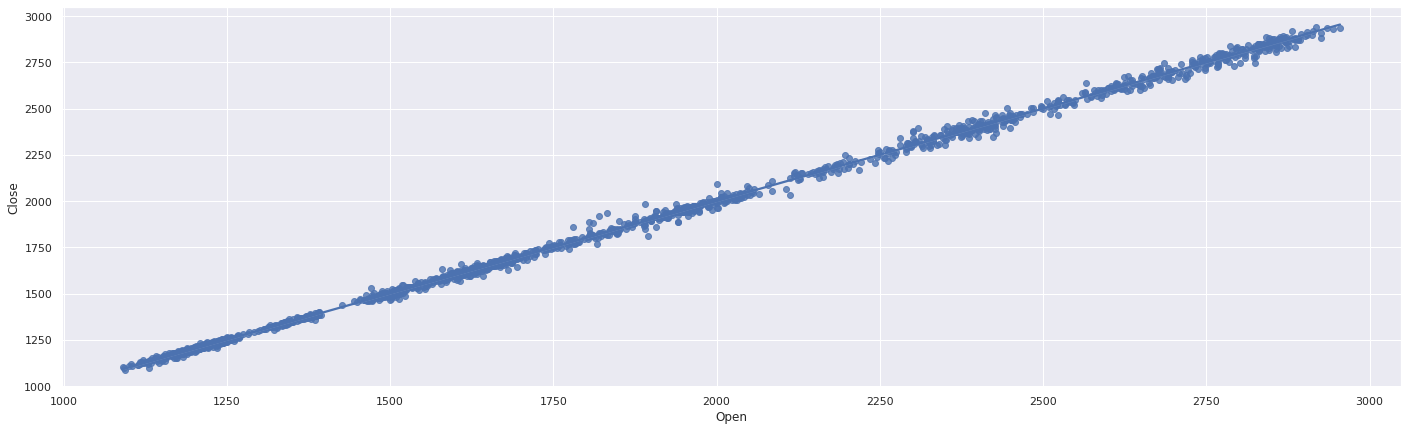

In [12]:
# regplot with a linar regression fit pattern
import seaborn as sns

# use the function regplot to make a scatterplot
sns.regplot(x=df["Open"], y=df["Close"])

plt.savefig("Plotting_Correlation_Scatterplot_With_Regression_Fit.jpg")

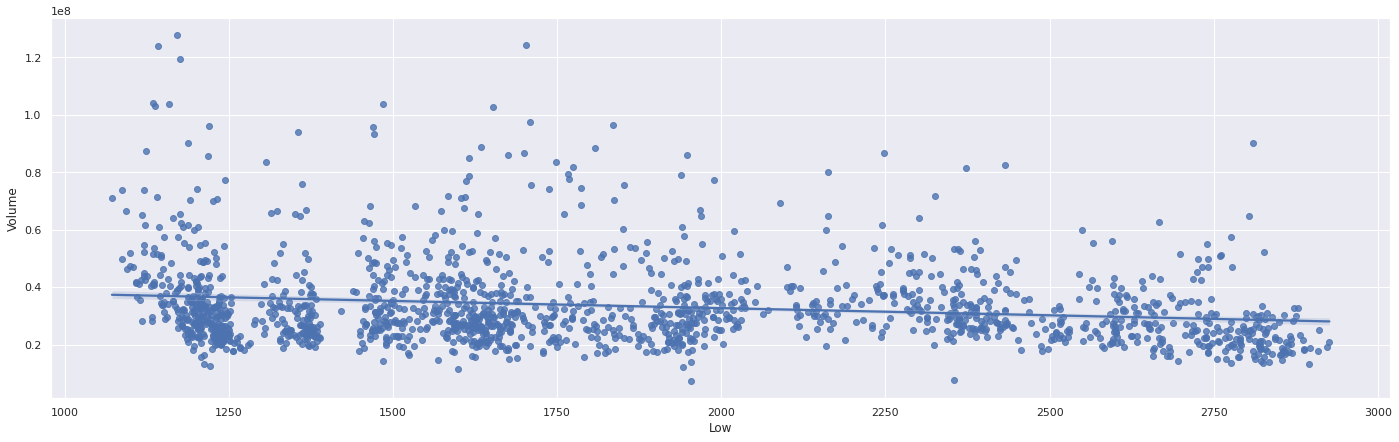

In [13]:
sns.regplot(x=df["Low"], y=df["Volume"])

plt.savefig("Plotting_Correlation_Scatterplot_With_Regression_Fit.jpg")

<AxesSubplot:>

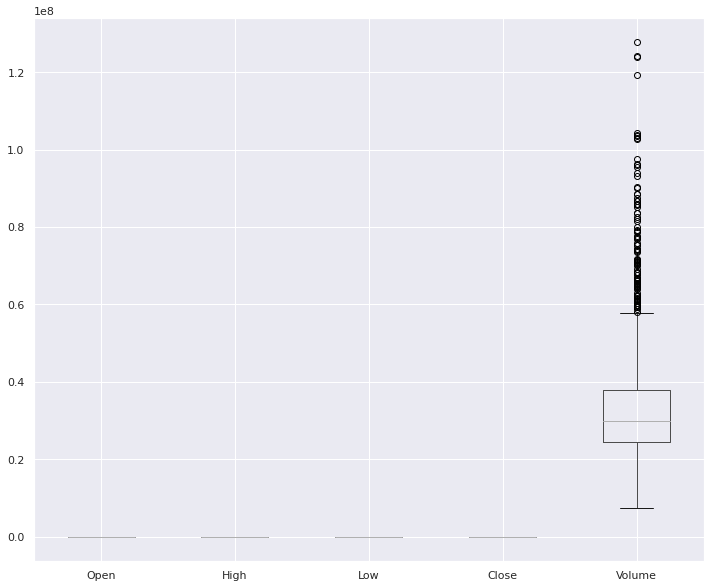

In [14]:
df.boxplot(figsize=(12,10))

In [15]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25,interpolation='midpoint')
   q3=df.quantile(0.75,interpolation='midpoint')
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers = find_outliers_IQR(df['Volume'])
print('number of outliers: '+ str(len(outliers)))
outliers = find_outliers_IQR(df['Open'])
print('number of outliers: '+ str(len(outliers)))
outliers = find_outliers_IQR(df['High'])
print('number of outliers: '+ str(len(outliers)))
outliers = find_outliers_IQR(df['Low'])
print('number of outliers: '+ str(len(outliers)))
outliers = find_outliers_IQR(df['Close'])
print('number of outliers: '+ str(len(outliers)))

number of outliers: 99
number of outliers: 0
number of outliers: 0
number of outliers: 0
number of outliers: 0


 # RNN


tested the recurent neural network model, however the model didnt prove to be good enough.

In [16]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn import metrics

In [17]:
df = pd.read_csv('../input/data-analytics-ue20cs312/train.csv')

df = df.drop(['Date'], axis = 1)
df = df.drop(['Close'], axis = 1)
df.head()

,Open,High,Low,Volume
0,1099.59,1110.75,1093.85,66545000
1,1117.47,1130.57,1112.75,41227200
2,1116.63,1138.68,1116.10,42316800
3,1122.00,1149.76,1117.56,64899600
4,1145.64,1149.96,1120.93,52138900


In [18]:
scaler = MinMaxScaler() # min = 0, max = 1
df = scaler.fit_transform(df)
df

array([[0.00495081, 0.002098  , 0.01189584, 0.49212882],
       [0.01454134, 0.01276017, 0.02208765, 0.28182818],
       [0.01409078, 0.01712294, 0.02389413, 0.29087887],
       ...,
       [0.65373269, 0.69793589, 0.66059652, 0.30312339],
       [0.69473379, 0.7189213 , 0.70401687, 0.1537413 ],
       [0.70829355, 0.73827673, 0.71966049, 0.21272197]])

In [19]:
# splitting data

X_train = []
y_train = []

# training data will have sets of 30 tuples - 1 - 20, 2 - 21, ...

for i in range(20, df.shape[0]): 
    X_train.append(df[i-20:i])
    y_train.append(df[i, 0])

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape, y_train.shape

((1635, 20, 4), (1635,))

In [21]:
# building LSTM

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [23]:
reg = Sequential()  # regressor

reg.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (20,4))) 
reg.add(Dropout(0.2))

reg.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
reg.add(Dropout(0.3))

reg.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
reg.add(Dropout(0.4))

reg.add(LSTM(units = 80, activation = 'relu')) 
reg.add(Dropout(0.5))

reg.add(Dense(units = 1))

reg.summary()

2022-10-16 16:37:49.726668: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 50)            11000     
_________________________________________________________________
dropout (Dropout)            (None, 20, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                5

In [24]:
reg.compile(optimizer = 'adam', loss = 'mean_squared_error')
reg.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30


2022-10-16 16:37:50.247696: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


52/52 [==============================] - 9s 59ms/step - loss: 0.0497
Epoch 2/30
52/52 [==============================] - 3s 59ms/step - loss: 0.0113
Epoch 3/30
52/52 [==============================] - 3s 60ms/step - loss: 0.0089
Epoch 4/30
52/52 [==============================] - 4s 69ms/step - loss: 0.0087
Epoch 5/30
52/52 [==============================] - 3s 60ms/step - loss: 0.0092
Epoch 6/30
52/52 [==============================] - 3s 61ms/step - loss: 0.0080
Epoch 7/30
52/52 [==============================] - 3s 59ms/step - loss: 0.0074
Epoch 8/30
52/52 [==============================] - 3s 59ms/step - loss: 0.0076
Epoch 9/30
52/52 [==============================] - 3s 59ms/step - loss: 0.0069
Epoch 10/30
52/52 [==============================] - 3s 59ms/step - loss: 0.0066
Epoch 11/30
52/52 [==============================] - 3s 59ms/step - loss: 0.0073
Epoch 12/30
52/52 [==============================] - 3s 58ms/step - loss: 0.0066
Epoch 13/30
52/52 [=============================

In [25]:
# test data set
test_data = pd.read_csv('../input/data-analytics-ue20cs312/test.csv')
test_data = test_data.drop(['Date'], axis = 1)
train_data = pd.read_csv('../input/data-analytics-ue20cs312/train.csv')
train_data = train_data.drop(['Date'], axis = 1)
train_data = train_data.drop(['Close'], axis = 1)

In [26]:
past_20 = train_data.tail(20) # to predict opening price of first day, we use data from last 20 days.

In [27]:
df = past_20.append(test_data)
df

,Open,High,Low,Volume
1635,2304.80,2327.05,2286.59,31569200
1636,2300.35,2379.31,2283.65,36901200
1637,2379.40,2416.51,2361.59,29712800
1638,2403.01,2440.50,2388.67,32707700
1639,2422.57,2455.72,2415.85,29494800
1640,2424.79,2438.46,2399.49,26993200
1641,2409.60,2437.68,2385.85,25386100
1642,2365.87,2407.28,2353.62,39187000
1643,2347.49,2397.98,2334.23,33107700
1644,2411.01,2434.34,2393.93,35048800


In [28]:
ip = scaler.transform(df)
ip

array([[0.65140479, 0.65640617, 0.65508   , 0.20160464],
       [0.64901788, 0.68451942, 0.6534946 , 0.24589454],
       [0.69141895, 0.70453115, 0.69552369, 0.18618457],
       [0.70408295, 0.71743656, 0.71012656, 0.21106151],
       [0.71457459, 0.72562416, 0.72478336, 0.18437377],
       [0.71576536, 0.71633914, 0.71596124, 0.16359439],
       [0.70761771, 0.71591954, 0.70860588, 0.15024512],
       [0.68416169, 0.69956587, 0.69122588, 0.26488139],
       [0.67430297, 0.69456294, 0.68076983, 0.21438409],
       [0.70837401, 0.71412279, 0.71296301, 0.23050771],
       [0.70985443, 0.71796913, 0.70251775, 0.21922341],
       [0.70586374, 0.71621542, 0.70978683, 0.20107884],
       [0.72240578, 0.73037425, 0.72727469, 0.16768697],
       [0.72801635, 0.73176754, 0.726331  , 0.17175879],
       [0.72298508, 0.72692061, 0.71086533, 0.31056263],
       [0.70903912, 0.71148684, 0.70944711, 0.18114672],
       [0.64308549, 0.64566332, 0.63840102, 0.34226746],
       [0.65373269, 0.69793589,

In [29]:
X_test = []
y_test = []

for i in range(20, ip.shape[0]):
    X_test.append(ip[i-20:i])
    y_test.append(ip[i, 0])
    

In [30]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape, y_test.shape

((35, 20, 4), (35,))

In [31]:
y_pred = reg.predict(X_test)

In [32]:
y_pred, y_test

(array([[0.7015667 ],
        [0.70120084],
        [0.7015717 ],
        [0.70179904],
        [0.70323604],
        [0.7052668 ],
        [0.7075975 ],
        [0.710813  ],
        [0.716042  ],
        [0.72159386],
        [0.7267349 ],
        [0.7313778 ],
        [0.73633754],
        [0.7408643 ],
        [0.74570024],
        [0.7517101 ],
        [0.7570889 ],
        [0.76423436],
        [0.7700628 ],
        [0.7733319 ],
        [0.7760474 ],
        [0.77702445],
        [0.7767202 ],
        [0.7760819 ],
        [0.77456534],
        [0.7728244 ],
        [0.77013266],
        [0.7670076 ],
        [0.76345944],
        [0.75989056],
        [0.75721   ],
        [0.7549819 ],
        [0.75361836],
        [0.7513046 ],
        [0.7474516 ]], dtype=float32),
 array([0.73235032, 0.73823444, 0.74177993, 0.7432228 , 0.71033181,
        0.72658957, 0.7274746 , 0.7459369 , 0.75623009, 0.75334435,
        0.76665201, 0.80464937, 0.79651244, 0.79836296, 0.79349797,
        0

In [33]:
scale = scaler.scale_[0] # first col was divided by this value while scaling

In [34]:
y_pred = y_pred * scale
y_test = y_test * scale

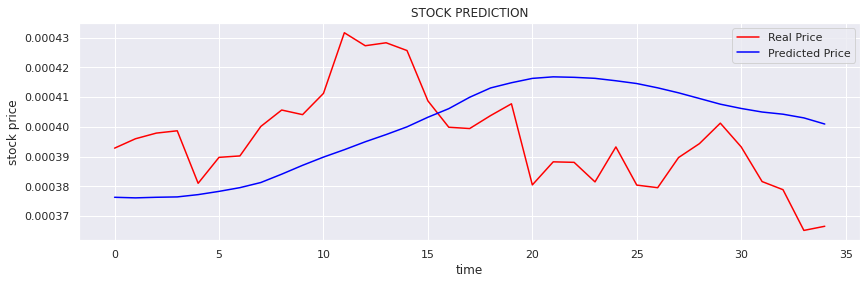

In [35]:
# visualization
plt.figure(figsize = (14,4))
plt.title("STOCK PREDICTION")
plt.plot(y_test, color = 'red', label = 'Real Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

**LINEAR REGRESSION**

**As the goal is for forecasting values, linear regression is used to fit a predictive model to an observed dataset of a and y values**

In [36]:
df=pd.read_csv('../input/data-analytics-ue20cs312/train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [37]:
df['Date'] = pd.to_datetime(df.Date)
df.describe()

,Open,High,Low,Close,Volume
count,1655.000000,1655.000000,1655.000000,1655.000000,1.655000e+03
mean,1854.826157,1870.274538,1840.560036,1855.569511,3.346129e+07
std,537.945756,543.761197,532.191764,537.712649,1.459129e+07
min,1090.360000,1106.850000,1071.790000,1087.520000,7.298300e+06
25%,1377.775000,1386.505000,1371.790000,1378.395000,2.453330e+07
50%,1699.260000,1714.270000,1687.490000,1701.650000,2.980690e+07
75%,2335.090000,2365.015000,2313.790000,2344.515000,3.790005e+07
max,2954.700000,2965.760000,2926.220000,2941.900000,1.276869e+08


In [38]:
print(len(df))

1655


In [39]:
x = df[['Open','High','Low','Volume']]
y = df['Close']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

x_train.shape



(1241, 4)

In [40]:
x_test.shape

(414, 4)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [42]:
regressor.fit(x_train,y_train)


LinearRegression()

In [43]:
print(regressor.coef_)


[-6.77689172e-01  8.44123368e-01  8.32606407e-01 -6.60947452e-09]


In [44]:
print(regressor.intercept_)


1.6203399275236734


In [45]:
df_test=pd.read_csv('../input/data-analytics-ue20cs312/test.csv')
x_test=df_test[['Open','High','Low','Volume']]

In [46]:
forecast_value = regressor.predict(x_test)


In [47]:
forecast_value

array([2485.89160724, 2473.92397589, 2481.41011608, 2438.2943618 ,
       2434.04457471, 2459.68462458, 2440.24540058, 2483.17844434,
       2479.22169247, 2520.86183157, 2535.34230411, 2601.29884502,
       2610.89659859, 2582.43759423, 2538.9115212 , 2492.59696072,
       2482.04496222, 2483.76590048, 2514.71039227, 2447.96987462,
       2436.88119489, 2415.03255184, 2422.69852315, 2443.29700513,
       2423.20106716, 2391.07480338, 2452.07756628, 2454.03475097,
       2482.12356386, 2490.26892147, 2425.17914706, 2408.70217171,
       2386.22942173, 2374.04925218, 2386.29023535])

In [48]:
ans=pd.DataFrame({'Date':df_test['Date'],'Close':forecast_value})


In [49]:
ans.head()

,Date,Close
0,2022-08-01,2485.891607
1,2022-08-02,2473.923976
2,2022-08-03,2481.410116
3,2022-08-04,2438.294362
4,2022-08-05,2434.044575


In [50]:
ans.to_csv('./ans.csv',index=False)

In [51]:
print(x_test)


       Open     High      Low    Volume
0   2455.71  2500.26  2447.87  24327600
1   2466.68  2494.73  2447.99  19076300
2   2473.29  2507.59  2449.39  27459700
3   2475.98  2487.75  2419.88  23699600
4   2414.66  2444.17  2409.01  18912400
5   2444.97  2475.18  2433.03  18104900
6   2446.62  2458.88  2427.54  16715500
7   2481.04  2501.79  2463.66  22158000
8   2500.23  2508.87  2467.32  18470800
9   2494.85  2535.06  2486.40  18402700
10  2519.66  2547.44  2511.43  17864800
11  2590.50  2618.08  2576.82  34351100
12  2575.33  2626.42  2567.45  22437600
13  2578.78  2599.93  2562.89  16909700
14  2569.71  2572.30  2531.28  21584300
15  2510.94  2519.43  2481.41  20293600
16  2480.12  2497.21  2466.14  15460800
17  2478.61  2498.60  2465.58  16889700
18  2493.73  2522.98  2490.33  16221600
19  2507.51  2521.29  2423.23  32486500
20  2412.76  2452.74  2402.20  21193500
21  2439.72  2445.64  2405.10  21106600
22  2439.12  2450.36  2409.08  26958500
23  2416.31  2459.01  2406.46  23909300


In [52]:
forecast_value.shape


(35,)

In [53]:
print(dfr)

NameError: name 'dfr' is not defined

In [ ]:
dfr.head(10)

**TIME SERIES**

In [ ]:
pip install pmdarima


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train=pd.read_csv('../input/data-analytics-ue20cs312/train.csv')
test=pd.read_csv('../input/data-analytics-ue20cs312/test.csv')
train
df=test

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [ ]:
t1= pd.read_csv('../input/data-analytics-ue20cs312/train.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [ ]:
t1

In [ ]:
#plot close price
plt.figure(figsize=(12,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(t1['Close'])
plt.title('Closing price')
plt.show()

In [ ]:
#Distribution of the dataset
df_close = t1['Close']
df_close.plot(kind='kde')

In [ ]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0, test='adf',max_p=3, max_q=3, m=1, d=None, seasonal=False, start_P=0,D=0,trace=True,error_action='ignore', suppress_warnings=True, stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
#Modeling
# Build Model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

